<a href="https://colab.research.google.com/github/sgodlewski23/College-Portfolio/blob/main/Lecture_6_(Functions)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 6 (Functions)

Today, we will learn:

- Functions
    - define your own function
    - find and write your own function documentation
    - why we use functions?
    - understand scope
    - application
    
## 1. Overview

One construct that is extremely useful and provided by almost all programming languages is `functions`.

A function is named section of a program that implements a specific task.

Many functions exist already and we can use them off the shlef.

We have already met several functions, such as

    - the `print()` function
    - the `sin()` function from the math package
    - `type()` function

One of the things we will learn is build your own (user-defined) functions.

We use function for the following purposes:

- *Re-usability*: writing code to do a specific task, and reuse the code by calling the function.
- *Organization*: keep the function for distinct operations.
- *Sharing*: share the code across multiple projects/collaborations.


In [ ]:
# examples:
max(14,19)

19

In [ ]:
print('UConn')

UConn


In [ ]:
str(10)

'10'

## 2. Defining Functions

The basic syntax is



In [ ]:
def function_name(inputs):
    # steps...
    return outputs

Note that `def` is used to tell Python we would like to define a new function. And `return` is used to tell Python what we want to return from a function.

Let's consider a toy example: $$f(x) = 5\times x + 1$$

In [ ]:
def f(x):
    return 5*x + 1

Now we've defined the function $f(x)$. Let's call it and check whether it does what we expect:

In [ ]:
f(6)

31

Let's consider a longer function, that computes the absolute value of a given number.

Note that there is a built-in function called `abs()` function. However, we can produce our own for the exercise.

In [ ]:
abs(-10)

10

In [ ]:
def absolute_value(x): 
    if x < 0:
        abs_value = -x
    else:
        abs_value = x
    return abs_value

In [ ]:
print(absolute_value(-10))

10


In addition, indentation controls blocks of code along with the scope rules.

To see this, compare a function with no inputs or return values.

In [ ]:
def f():
    print("a")
    print("b")
f()

a
b


With the following change of indentation,

In [ ]:
def f():
    print("a")
print("b")
f()

b
a


**scope rules**

Let's generate a mean function as follows:

In [ ]:
def mean(numbers):
    total = sum(numbers)
    N = len(numbers)
    answer = total / N
    return answer


In [ ]:
x = range(10) # name the input
the_mean = mean(x) # name the output
the_mean

4.5

Notice that we named the input to `x` and we called the output `the_mean`.

When we defined the function, the input was called `numbers` and the output `answer`...

This is an example of a programming concept called variable scope. For more details, check [this](http://python-textbok.readthedocs.io/en/1.0/Variables_and_Scope.html) reference.

In Python, functions define their own scope for variables.

In this example, although we called the output `answer` inside of the function `mean`, **this variable name was only valid inside of the function**. To check this out, try to see what the value of `N` or `total`.


In [ ]:
answer

NameError: name 'answer' is not defined

In [ ]:
print(total)

NameError: name 'total' is not defined

In [ ]:
print(N)

NameError: name 'N' is not defined

However, **we don't have to name the input or output**, and we can call the function directly:

In [ ]:
mean(range(10))

4.5

Furthermore, the same name can be used to variables inside of blocks of code and in the outer "scope":

In [ ]:
x = 1
print("x is", x)
def f():
    x = 10 # set a different "x"
    print("x is", x)
f() # call the function
print("x is", x)

x is 1
x is 10
x is 1


## 3. Application

Let's simulate and plot the white noixe process $\epsilon_0,\epsilon_1,...,\epsilon_T$, where each draw $\epsilon_t$ is independent standard normal.

We first import the most popular packages called `numpy` and `matplotlib.pyplot` that will be explored in details later.



In [ ]:
import numpy as np
np.random.randn() # this generate a random number from N(0,1)

0.256403153981322

Let's define a function that generate `T` random numbers as follows:


In [ ]:
def generate_data(T):
    eps_values = [] # empty list
    for i in range(T):
        e = np.random.randn()
        eps_values.append(e)
    return eps_values

Then we can generate 100 random numbers from standard normal and plot them:

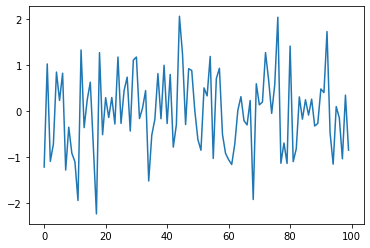

In [ ]:
data = generate_data(100)
#print(data)

# import matplotlib.pyplot package
import matplotlib.pyplot as plt

# The next two lines genererate the plot.
plt.plot(data)
plt.show()

Here t is on the horiaontal axis (from 1 to 100) and $\epsilon_t$ is on the vertical axis.

Using the `numpy` functions, let's check the mean and variance of generated datasets.

In [ ]:
print("the mean is", np.mean(data)) # find a mean of generated data
print("the variance is", np.var(data))  # find a variance of generated data

the mean is -2.4657966203451148e-05
the variance is 0.9998690510656096


#### Generalization: Add conditions statement  

Let's give additional condition, that the function generate either standard normal or uniform random variables on (0, 1) using the conditional statement as follows.


In [ ]:
def generate_data(T, generater_type):
    eps_values = []
    for i in range(T):
        if generater_type == 'Uniform':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        eps_values.append(e)
    return eps_values

Note that equaltity is tested with the `==` syntax, not `=`. For example,
    - the statement `a = 5` assigns the name `a` to the value `5`.
    - the expression `a == 5` evaluates to either True or False, depending on the value `a`.

Let's generate random numbers from an uniform distribution (0, 1):

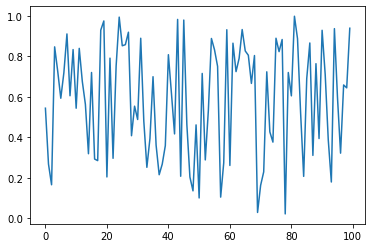

the mean is 0.5853109910430558
the variance is 0.07514192617445742


In [ ]:
data2 = generate_data(100, 'Uniform')
plt.plot(data2)
plt.show()

print("the mean is", np.mean(data2)) # find a mean of generated data
print("the variance is", np.var(data2))  # find a variance of generated data

We can simplify the `generate_data` function code. 

For example, we can get rid of the conditionals all together by just passing the desired generator_type as a "function".


In [ ]:
def generate_data(T, generator_type):
    eps_values = []
    for i in range(T):
        e = generator_type()
        eps_values.append(e)
    return eps_values

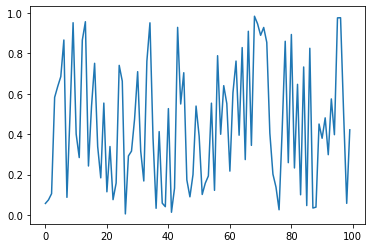

In [ ]:
# Then we can generate data from Uniform(0,1)
data3 = generate_data(100, np.random.uniform)
plt.plot(data3)
plt.show()

Now, when we call the `generate_data()` function, we pass `np.random.uniform` as the second argument.

This object is a *function*.

i.e., when `generate_data(100, np.random.uniform)` is excuted, Python runs the function code block with `T` equals to 100 and the name `generater_type` "bound" to the function `np.random.uniform`.

In [ ]:
# or from N(0,1)
data4 = generate_data(100, np.random.randn)
print("the mean is", np.mean(data4)) # find a mean of generated data
print("the variance is", np.var(data4))  # find a variance of generated data

the mean is -0.017771712340814354
the variance is 0.923460858060586


To understand this principle, consider the following example:

In [ ]:
min(3, 1, 10) # min() is a built-in function

1

In [ ]:
m = min
m(3, 1, 10)

1

Here we created another name for the built-in function `min()`, which could then be used in identical ways.